In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma,t
from numpy import random, linalg
from scipy.stats import multivariate_normal
from scipy.stats import truncnorm

In [132]:

#Gibbs parameters
samples=10000
Vt = 0 #################### OBS! do we need to initialize this hyperparameter = variance of t?
#s1,s2 -Assembler
s1_list=[]
s2_list=[]

#mean S assembler
mean_s=np.array([[25],[25]])
mean_s1=[]
mean_s2=[]
mean_s1.append(float(mean_s[0]))
mean_s2.append(float(mean_s[1]))

#dev S assembler
dev_s=np.array([[8.3,0],[0,8.3]])
dev_s1=[]
dev_s2=[]
dev_s1.append(float(dev_s[0,0]))
dev_s2.append(float(dev_s[1,1]))
print(f'V1 and V2 initial values are {dev_s1} and {dev_s2}')
#def A
A=np.array([[1,-1]])

# #Initial values of s1 and s2
s1=random.normal(loc=mean_s1,scale=np.sqrt(dev_s1),size=1)
s2=random.normal(loc=mean_s2,scale=np.sqrt(dev_s2),size=1)

s1_list.append(s1)
s2_list.append(s2)
print(f's1 and s2 initial values are {s1} and {s2}')
a=0
b=np.inf


V1 and V2 initial values are [8.3] and [8.3]
s1 and s2 initial values are [23.1044028] and [27.12427716]


In [133]:
#Gibbs sampling
for i in range(samples-1):

    #p(t>0|s1,s2)
    mean_t=s1-s2
    dev_t=dev_s[0,0]+dev_s[1,1] + Vt ################## do we need Vt?
    t=truncnorm.rvs((a-mean_t)/np.sqrt(dev_t),(b-mean_t)/np.sqrt(dev_t),loc=mean_t,scale=np.sqrt(dev_t))
    
    # #p(s1,s2|t>0)
    dev_s_old=dev_s
    dev_s=np.linalg.inv(np.linalg.inv(dev_s)+np.transpose(A)*1/dev_t*A)
    mean_s=dev_s@(np.linalg.inv(dev_s_old)@mean_s+np.transpose(A)*1/dev_t*t)
    s1=random.normal(loc=mean_s[0],scale=np.sqrt(dev_s[0][0]),size=1)
    s2=random.normal(loc=mean_s[1],scale=np.sqrt(dev_s[1][1]),size=1)

    mean_s1.append(float(mean_s[0]))
    mean_s2.append(float(mean_s[1]))
    dev_s1.append(float(dev_s[0][0]))
    dev_s2.append(float(dev_s[1][1]))
    s1_list.append(float(s1))
    s2_list.append(float(s2))



print(len(s1_list))
print(len(s2_list))   


10000
10000


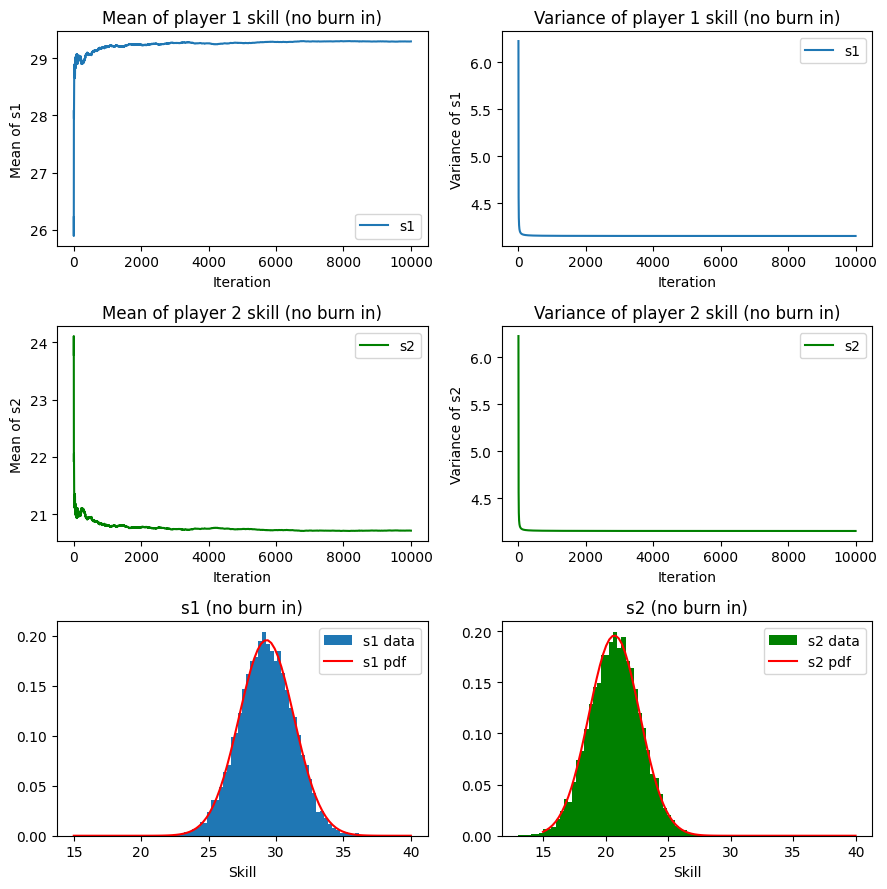

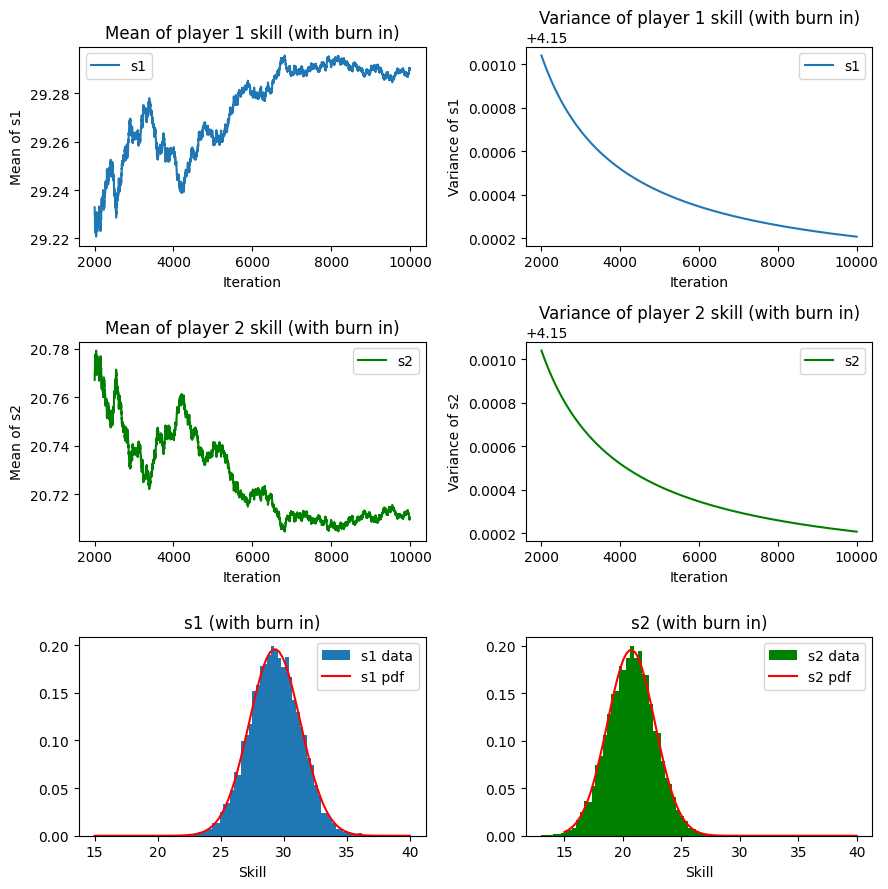

In [134]:
burn_in = 2000
from scipy import stats
no_burn_in = 1 # problems plotting with = 0 so we set it to 1
burn_list = [no_burn_in, burn_in]
for i in range(len(burn_list)):
    burn = burn_list[i]

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
    
    burn_title = '(no burn in)' if burn == no_burn_in else '(with burn in)'

    # Player 1
    # Plot the mean of s1 (skill of player 1)
    axes[0, 0].plot(range(burn, samples), mean_s1[burn:], label='s1') 
    axes[0, 0].set_title(f'Mean of player 1 skill {burn_title}')
    axes[0, 0].set_xlabel('Iteration')
    axes[0, 0].set_ylabel('Mean of s1')

    # Plot the variance of s1 (skill of player 1)
    axes[0, 1].plot(range(burn, samples), dev_s1[burn:], label='s1')
    axes[0, 1].set_title(f'Variance of player 1 skill {burn_title}')
    axes[0, 1].set_xlabel('Iteration')
    axes[0, 1].set_ylabel('Variance of s1')

    # Player 2
    # Plot the mean of s2 (skill of player 2)
    axes[1, 0].plot(range(burn, samples), mean_s2[burn:], label='s2', color='g') 
    axes[1, 0].set_title(f'Mean of player 2 skill {burn_title}')
    axes[1, 0].set_xlabel('Iteration')
    axes[1, 0].set_ylabel('Mean of s2')

    # Plot the variance of s2 (skill of player 2)
    axes[1, 1].plot(range(burn, samples), dev_s2[burn:], label='s2', color='g')
    axes[1, 1].set_title(f'Variance of player 2 skill {burn_title}')
    axes[1, 1].set_xlabel('Iteration')
    axes[1, 1].set_ylabel('Variance of s2')

    # Create pdf for player s1 and player s2
    x_span = np.linspace(15, 40, 100)     ############# change this to fit the data
    axes[2, 0].hist(s1_list[burn:], bins=50, density=True, label=f's1 data')
    axes[2, 0].plot(x_span, stats.norm.pdf(x_span, mean_s1[-1], np.sqrt(dev_s1[-1])), 'r', label=f's1 pdf')
    axes[2, 0].set_title(f's1 {burn_title}')
    axes[2, 0].set_xlabel('Skill')

    axes[2, 1].hist(s2_list[burn:], bins=50, density=True, color='g', label=f's2 data')
    axes[2, 1].plot(x_span, stats.norm.pdf(x_span, mean_s2[-1], np.sqrt(dev_s2[-1])), 'r', label=f's2 pdf')
    axes[2, 1].set_title(f's2 {burn_title}')
    axes[2, 1].set_xlabel('Skill')

    for ax in axes.ravel():
        ax.legend()
    

    plt.tight_layout()
    plt.show()
